In [4]:
import cv2

In [2]:
#!wget https://www.dropbox.com/sh/7z7xq2lq3ogspcv/AABMgQwzRE8GVKb6HYGWCgrfa/dataset?dl=0
#!wget https://www.dropbox.com/sh/7z7xq2lq3ogspcv/AABIZPln7DF7ELltrCrG7pkfa/trainLabels.csv?dl=0

In [ ]:
# After dataset has been downloaded from dropbox it was then upload to the drive

In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [7]:
!unzip /content/drive/MyDrive/retinopathy/dataset.zip

Archive:  /content/drive/MyDrive/retinopathy/dataset.zip
mapname:  conversion of  failed
 extracting: 95_left.jpeg            
 extracting: 99_left.jpeg            
 extracting: 84_left.jpeg            
 extracting: 899_left.jpeg           
 extracting: 967_left.jpeg           
 extracting: 879_left.jpeg           
 extracting: 844_left.jpeg           
 extracting: 939_left.jpeg           
 extracting: 876_left.jpeg           
 extracting: 941_left.jpeg           
 extracting: 909_left.jpeg           
 extracting: 862_left.jpeg           
 extracting: 958_left.jpeg           
 extracting: 84_right.jpeg           
 extracting: 932_left.jpeg           
 extracting: 966_left.jpeg           
 extracting: 953_left.jpeg           
 extracting: 925_left.jpeg           
 extracting: 992_left.jpeg           
 extracting: 980_left.jpeg           
 extracting: 971_left.jpeg           
 extracting: 877_left.jpeg           
 extracting: 869_left.jpeg           
 extracting: 897_left.jpeg           

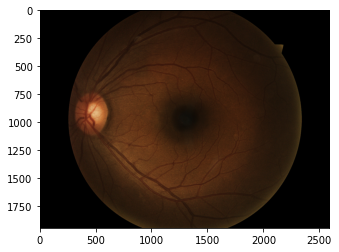

In [8]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('84_left.jpeg')
imgplot = plt.imshow(img)
plt.show()

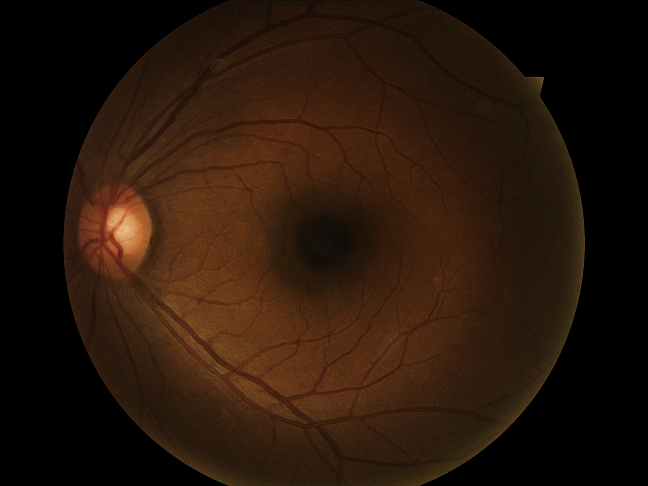

In [9]:
from google.colab.patches import cv2_imshow
import cv2
scale_percent = 25

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width = int(RGB_img.shape[1] * scale_percent / 100)
height = int(RGB_img.shape[0] * scale_percent / 100)

dsize = (width, height)
output = cv2.resize(RGB_img, dsize)

cv2_imshow(output)

In [10]:
import glob
import numpy as np
import os
import shutil

In [11]:
Matches=glob.glob('*.jpeg')

In [12]:
len(Matches)

1427

In [13]:
Matches=np.array(Matches)

In [14]:
os.chdir('/content/drive/MyDrive/retinopathy')

In [15]:
import pandas as pd
df=pd.read_csv('trainLabels.csv?dl=0')

In [16]:
list_of_labels=list(df['image'])

In [17]:
list_of_labels[:5]

['84_left', '84_right', '95_left', '95_right', '99_left']

In [18]:
pwd

'/content/drive/My Drive/retinopathy'

In [19]:
# Now we need to prepare the data 
if not os.path.exists('data'):#/content/data
  os.makedirs('data')



In [20]:
os.path.exists('data')
os.chdir("..")
os.chdir("..")

In [21]:
os.chdir('/content')

In [22]:
pwd

'/content'

In [23]:
"""for item in list_of_labels: #/content/8421_right.jpeg
  for selection in Matches:
    if str(selection)==item+".jpeg":
      shutil.move(selection,'drive/MyDrive/retinopathy/data')"""

for item in Matches:
  shutil.move(item,'drive/MyDrive/retinopathy/data')


Error: ignored

In [24]:
os.chdir('drive/MyDrive/retinopathy/data')

In [25]:
len(os.listdir())

1427

In [28]:
pwd

'/content/drive/My Drive/retinopathy/data'

In [29]:
X_data = []
#X_data=np.array(X_data)
for myFile in os.listdir():
    try:
        image = cv2.imread(myFile,cv2.IMREAD_COLOR)
        new_img=cv2.resize(image,(150,150))
        condition=(df['image']==myFile.split('.')[0])
        label=np.select(condition,df['level'])
        label=label.tolist()
        #img_arr=np.concatenate((new_img),label))
        X_data.append([new_img,label])
    except Exception as e:
        pass

#print('X_data shape:', np.array(X_data).shape)

In [30]:
X_data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 2, 0],
         ...,
         [0, 4, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 2, 0],
         ...,
         [0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), 0]

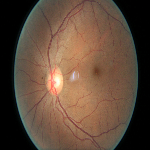

In [31]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_data[5][0]) #This is the image

In [32]:
X_data[5][1] # This is it's label

0

In [33]:
df.head()

,image,level
0,84_left,0
1,84_right,0
2,95_left,0
3,95_right,0
4,99_left,3


In [34]:
X = []
y = []
for i in range(len(X_data)):
  X.append(X_data[i][0])
  y.append(X_data[i][1])

# converting x & y to numpy array as they are list
X = np.array(X)
y = np.array(y)

In [35]:
X.shape

(1427, 150, 150, 3)

In [36]:
y.shape

(1427,)

In [37]:
np.unique(y, return_counts=True) # Display of the number of unique labels

(array([0, 1, 2, 3, 4]), array([1017,  112,  230,   32,   36]))

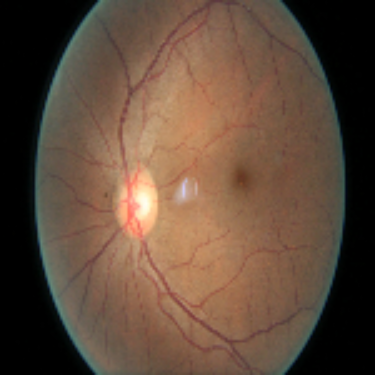

In [38]:
sample=cv2.resize(X[5], (0,0), fx=2.5, fy=2.5)
cv2_imshow(sample)

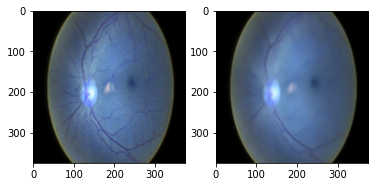

In [39]:
 
# denoising of image saving it into dst image
dst = cv2.fastNlMeansDenoisingColored(sample, None, 10, 10, 7, 15)
  
# Plotting of source and destination image
plt.subplot(121), plt.imshow(sample)
plt.subplot(122), plt.imshow(dst)
  
plt.show()

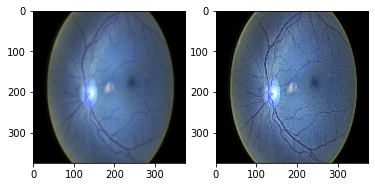

In [40]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(sample, -1, kernel)
plt.subplot(121), plt.imshow(sample)
plt.subplot(122), plt.imshow(im)
  
plt.show()

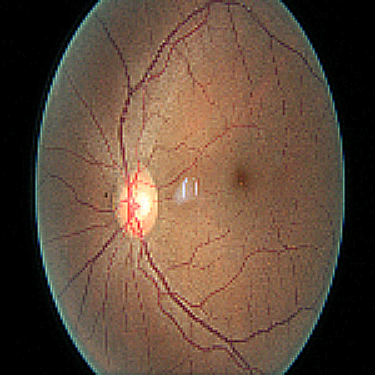

In [42]:

cv2_imshow(im)


In [86]:
#cv2.GaussianBlur(sample, image,size=(0, 0), 3);
#cv2.addWeighted(sample, 1.5, image, -0.5, 0, image);

SyntaxError: ignored